# **Project Name**    -



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

In this project, I have developed a Kindle Book Recommender System that helps users discover books they are likely to enjoy based on their preferences and reading history. The system uses user ratings, book metadata, and user behavior patterns to provide personalized recommendations.

I explored and analyzed the dataset through Exploratory Data Analysis (EDA) to uncover insights about user demographics, popular books, and rating trends. Then, I implemented both collaborative filtering and content-based filtering techniques to build effective recommendation models.

This system aims to enhance user experience on Kindle by making the book discovery process smarter and more engaging. It can be especially useful for readers looking to explore new titles or authors based on their interests.



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


ith the vast number of books available on the Kindle platform, users often face difficulty in finding books that match their interests and reading preferences. The challenge is to design a personalized book recommendation system that can help users discover relevant and engaging books by analyzing their previous interactions, ratings, and book features.

The goal of this project is to develop a system that recommends books to users based on their reading behavior and preferences, thereby improving user satisfaction and engagement on the Kindle platform.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [2]:
# Load Dataset
books = pd.read_csv('/content/Books.csv')
ratings = pd.read_csv('/content/Ratings.csv')
users = pd.read_csv('/content/Users.csv')

<ipython-input-2-1033151865>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('/content/Books.csv')


### Dataset First View

In [6]:
# Dataset First Look
books.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
ratings.head(5)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
users.head(5)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Dataset Rows & Columns count

In [9]:
# Dataset Rows & Columns count
books.shape

(271360, 8)

In [10]:
ratings.shape

(1149780, 3)

In [11]:
users.shape

(278858, 3)

### Dataset Information

In [12]:
# Dataset Info
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [13]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


#### Duplicate Values

In [15]:
# Dataset Duplicate Value Count
books.duplicated().sum()

np.int64(0)

In [16]:
ratings.duplicated().sum()

np.int64(0)

In [17]:
users.duplicated().sum()

np.int64(0)

There is no duplicated values in 3 data sets

#### Missing Values/Null Values

In [18]:
# Missing Values/Null Values Count
books.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2
Image-URL-S,0
Image-URL-M,0
Image-URL-L,3


In [19]:
ratings.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0


In [20]:
users.isnull().sum()

,0
User-ID,0
Location,0
Age,110762


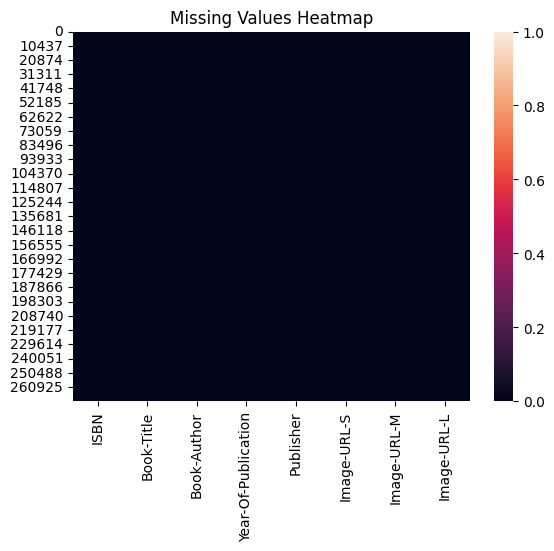

In [21]:
# Visualizing the missing values
sns.heatmap(books.isnull())
plt.title("Missing Values Heatmap")
plt.show()


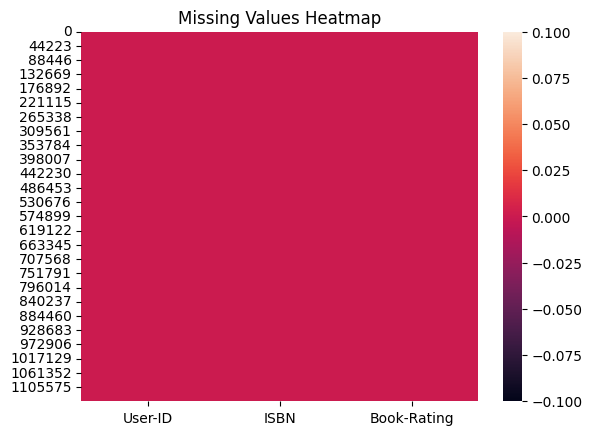

In [22]:
sns.heatmap(ratings.isnull())
plt.title("Missing Values Heatmap")
plt.show()

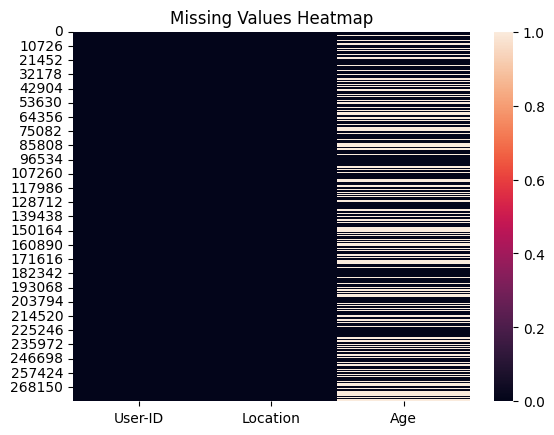

In [23]:
sns.heatmap(users.isnull())
plt.title("Missing Values Heatmap")
plt.show()

### What did you know about your dataset?

* The null values are negligible in the two data sets books and ratings. The Age column in the users data sets contain 110762 missing values out of 278858 rows.
* The rating of the book have range from 1 to 10


## ***2. Understanding Your Variables***

In [24]:
# Dataset Columns
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [25]:
ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [26]:
users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [27]:
# Dataset Describe
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,020130998X,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/042509474X.0...,http://images.amazon.com/images/P/042509474X.0...,http://images.amazon.com/images/P/006091985X.0...
freq,1,27,632,13903,7535,2,2,2


In [28]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [29]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


### Variables Description

**ISBN:** Unique identifier for each book

**Book-Title:** Title of the book

**Book-Author:** Name of the book’s author

**Year-Of-Publication**: Year the book was published

**Publisher:** Name of the publisher

**Image-URL-S:** URL of the book’s small cover image

**Image-URL-M:** URL of the book’s medium cover image

**Image-URL-L:** URL of the book’s large cover image

**User-ID:** Unique identifier for each user

**Location:** User’s location in the format city, state, country

**Age:** Age of the user (can be missing or invalid in some cases)

**Book-Rating:** Rating given by the user (0 to 10, where 0 often means implicit rating)

### Check Unique Values for each variable.

In [30]:
# Check Unique Values for each variable.
books.nunique()

,0
ISBN,271360
Book-Title,242135
Book-Author,102022
Year-Of-Publication,202
Publisher,16807
Image-URL-S,271044
Image-URL-M,271044
Image-URL-L,271041


In [31]:
ratings.nunique()

,0
User-ID,105283
ISBN,340556
Book-Rating,11


In [32]:
users.nunique()

,0
User-ID,278858
Location,57339
Age,165


## 3. ***Data Wrangling***

### Data Wrangling Code

(1) Handling null values

In [33]:
# Write your code to make your dataset analysis ready.
books_null = books.dropna()
print(books.shape)
print(books_null.shape)

(271360, 8)
(271353, 8)


In [34]:
books_null.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0
Image-URL-S,0
Image-URL-M,0
Image-URL-L,0


In [35]:
ratings_null = ratings.dropna()
print(ratings.shape)
print(ratings_null.shape)

(1149780, 3)
(1149780, 3)


In [36]:
ratings_null.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0


(2) Checking Datatypes

In [37]:
books_null.dtypes

,0
ISBN,object
Book-Title,object
Book-Author,object
Year-Of-Publication,object
Publisher,object
Image-URL-S,object
Image-URL-M,object
Image-URL-L,object


In [38]:
books_null['Year-Of-Publication'] = pd.to_numeric(books_null['Year-Of-Publication'], errors='coerce')

<ipython-input-38-1970919616>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_null['Year-Of-Publication'] = pd.to_numeric(books_null['Year-Of-Publication'], errors='coerce')


In [39]:
books_null.dtypes

,0
ISBN,object
Book-Title,object
Book-Author,object
Year-Of-Publication,int64
Publisher,object
Image-URL-S,object
Image-URL-M,object
Image-URL-L,object


In [40]:
ratings.dtypes

,0
User-ID,int64
ISBN,object
Book-Rating,int64


In [41]:
users.dtypes

,0
User-ID,int64
Location,object
Age,float64


(3) Handling outliers

In [42]:
# Check the rows where Year-Of-Publication is less than 1500 or greater than 2025
invalid_years = books_null[(books_null['Year-Of-Publication'] < 1500) | (books_null['Year-Of-Publication'] > 2025)]

# Get the number of such rows
num_invalid_rows = invalid_years.shape[0]

print(f"Number of rows with invalid 'Year-Of-Publication': {num_invalid_rows}")


Number of rows with invalid 'Year-Of-Publication': 4632


In [43]:
# Let's only keep years from 1500 to 2025 only
books_final = books_null[(books_null['Year-Of-Publication'] >= 1500) & (books_null['Year-Of-Publication'] <= 2025)]
books_final.shape

(266721, 8)

In [44]:
# remove if any ratings below 0 and above 10
ratings_final = ratings_null[(ratings_null['Book-Rating'] >= 0) & (ratings_null['Book-Rating'] <= 10)]
ratings_final.shape

(1149780, 3)

In [45]:
sorted_ages = users['Age'].unique()
sorted_ages = np.sort(sorted_ages)
print(sorted_ages)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 113. 114. 115. 116. 118. 119. 123. 124. 127. 128. 132. 133. 136. 137.
 138. 140. 141. 143. 146. 147. 148. 151. 152. 156. 157. 159. 162. 168.
 172. 175. 183. 186. 189. 199. 200. 201. 204. 207. 208. 209. 210. 212.
 219. 220. 223. 226. 228. 229. 230. 231. 237. 239. 244.  nan]


we have many outliers and null values in Age column

* First we can make a users data set having all the null values and outliers are removed

In [46]:
users_cleaned1 = users[(users['Age'] >= 13) & (users['Age'] <= 90)]
sorted_ages = users_cleaned1['Age'].unique()
sorted_ages = np.sort(sorted_ages)
print(sorted_ages)

[13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.
 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48.
 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66.
 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84.
 85. 86. 87. 88. 89. 90.]


In [47]:
users_cleaned1.isnull().sum()

,0
User-ID,0
Location,0
Age,0


In [48]:
print(users.shape)
print(users_cleaned1.shape)

(278858, 3)
(166200, 3)


* Now let's make another user table where outliers are removed and null values filled with median

In [49]:
# Step 1: Calculate the median age from the valid range
valid_age_median = users[(users['Age'] >= 13) & (users['Age'] <= 90)]['Age'].median()

# Step 2: Create a copy and fill NaN values with the median
users_filled = users.copy()
users_filled['Age'] = users_filled['Age'].fillna(valid_age_median)

# Step 3: Filter to keep only ages in the range 13 to 90
users_cleaned2 = users_filled[(users_filled['Age'] >= 13) & (users_filled['Age'] <= 90)]


In [50]:
print(users.shape)
print(users_cleaned2.shape)

(278858, 3)
(276962, 3)


In [51]:
users_cleaned2.isnull().sum()

,0
User-ID,0
Location,0
Age,0


* Now we can make another user table where age column is removed

In [52]:
users_cleaned3 = users.drop(columns=['Age'])
print(users.shape)
print(users_cleaned3.shape)

(278858, 3)
(278858, 2)


In [53]:
users_cleaned3.isnull().sum()

,0
User-ID,0
Location,0


In [54]:
users_final1 = users_cleaned1
users_final2 = users_cleaned2
users_final3 = users_cleaned3

In [55]:
users_cleaned3.shape

(278858, 2)

In [56]:
users_final3.shape

(278858, 2)

In [57]:
users_final3.head(5)

,User-ID,Location
0,1,"nyc, new york, usa"
1,2,"stockton, california, usa"
2,3,"moscow, yukon territory, russia"
3,4,"porto, v.n.gaia, portugal"
4,5,"farnborough, hants, united kingdom"


(3) Checking for duplicates

In [58]:
print(books_final.duplicated().sum())
print(ratings_final.duplicated().sum())
print(users_final1.duplicated().sum())
print(users_final2.duplicated().sum())
print(users_final3.duplicated().sum())

0
0
0
0
0


(4) Combining tables

In [59]:
# Step 1: Merge ratings with books
ratings_books = ratings_final.merge(books_final.drop(columns=['Image-URL-M', 'Image-URL-L']), on='ISBN', how='inner')

# Step 2: Merge the result with users
df_age = ratings_books.merge(users_final2, on='User-ID', how='inner')


In [60]:
df_age.head(5)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",32.0
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,"seattle, washington, usa",32.0
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,"h, new south wales, australia",16.0
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,"rijeka, n/a, croatia",16.0
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,"rijeka, n/a, croatia",16.0


In [61]:
df_age.shape

(1007887, 10)

In [62]:
df_age.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0
Image-URL-S,0
Location,0
Age,0


In [63]:
# Step 1: Merge ratings with books
ratings_books = ratings_final.merge(books_final.drop(columns=['Image-URL-M', 'Image-URL-L']), on='ISBN', how='inner')

# Step 2: Merge the result with users
df = ratings_books.merge(users_final3, on='User-ID', how='inner')

In [64]:
df.head(5)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Location
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa"
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,"seattle, washington, usa"
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,"h, new south wales, australia"
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,"rijeka, n/a, croatia"
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,"rijeka, n/a, croatia"


In [65]:
df.shape

(1017064, 9)

In [66]:
df.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0
Image-URL-S,0
Location,0


In [67]:
users.shape

(278858, 3)

In [ ]:
#ratings_final.to_csv('ratings_final.csv', index=False)

#from google.colab import files
#files.download('ratings_final.csv')

In [ ]:
# df_age.to_csv('df_age.csv', index=False)

# from google.colab import files
# files.download('df_age.csv')

### What all manipulations have you done and insights you found?

* we have removed the null values from the data sets. Since  we have too many null values in the Age column, we have imputed the null values with median.
* we have removed outliers from the year column and Age column
* we have created 3 datasets from users table one have all null values and outliers removed, the second one have outliers removed and null values imputed with median and in third one we removed the entire column of Age so that we have all details of users.
* We combined all the tables into one, this also have in two forms. one with age (df_age) and one without age (df).

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

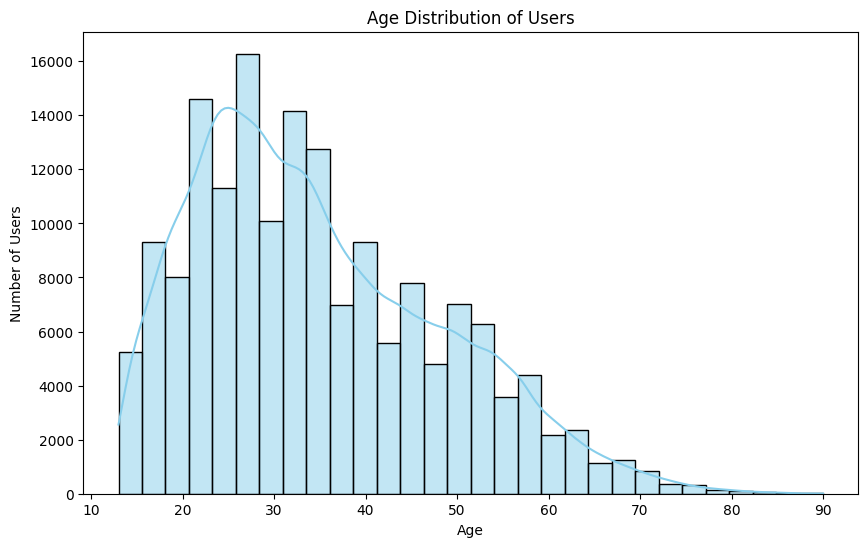

In [68]:
# Chart - 1 visualization code

plt.figure(figsize=(10, 6))
sns.histplot(data=users_final1, x='Age', bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()


##### 1. Why did you pick the specific chart?

The histogram combined with the KDE plot was chosen because it provides a comprehensive view of the distribution of users' ages in the dataset. The histogram shows the actual count of users in different age brackets, while the KDE curve helps visualize the underlying probability distribution, making it easier to spot trends and patterns, such as peaks and skews. This visual is particularly useful when working with continuous numerical data like age, as it reveals the concentration and spread of user age groups at a glance.

##### 2. What is/are the insight(s) found from the chart?

From the chart, one clear insight is that the majority of users fall within the 20–40 age range, with a prominent peak around the mid to late 20s. There's a gradual decline in user count as age increases beyond 40, and very few users are under 18 or over 65. This suggests that the platform or service is most popular among young to middle-aged adults, and not widely adopted by teenagers or seniors.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can absolutely support positive business decisions. Knowing that the core user base is aged 20–40 allows for better targeting in marketing campaigns, product features, and user experience design. Businesses can tailor their offerings to better meet the preferences of this age group, leading to higher engagement and customer satisfaction.

As for negative growth indicators, the low user count in older demographics might represent a missed opportunity. If older adults could benefit from the product or service but are not engaging with it, it could indicate barriers such as usability, awareness, or relevance. Addressing these could open up new growth areas. However, this decline isn't necessarily negative—if the product is intentionally designed for a younger demographic, then the chart confirms that the audience is being reached effectively.

#### Chart - 2

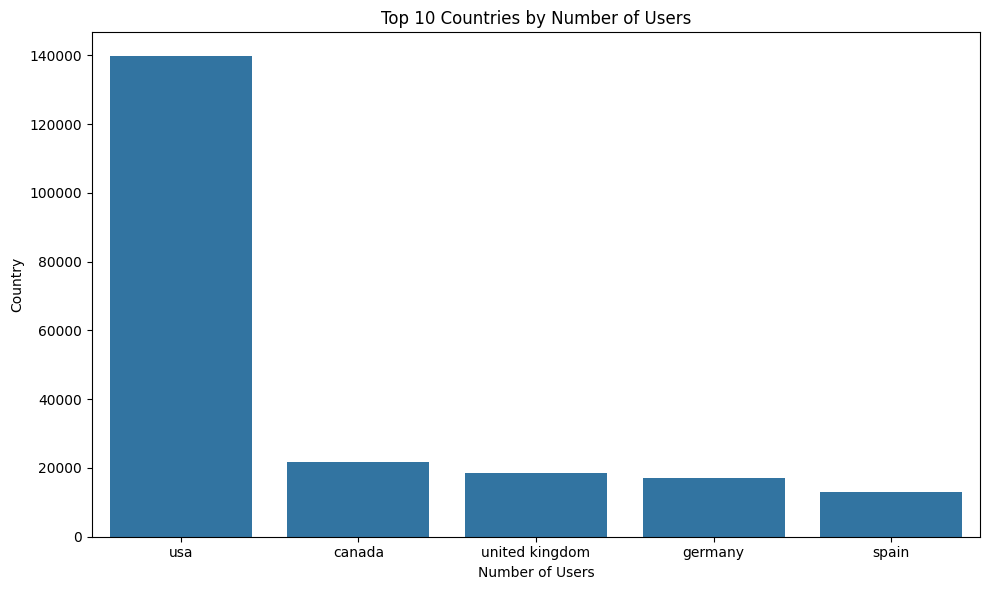

In [69]:
# Chart - 2 visualization code

# Extract country
country_series = users_final3['Location'].str.split(',').str[-1].str.strip().str.lower()

# Get top 10 countries by user count
top_countries = country_series.value_counts().head(5)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(y=top_countries.values, x=top_countries.index)
plt.title('Top 10 Countries by Number of Users')
plt.xlabel('Number of Users')
plt.ylabel('Country')
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

The bar chart showing the Top 5 Countries by Number of Users was chosen because it clearly visualizes the user distribution by country in a way that's easy to interpret at a glance. Bar charts are ideal for comparing discrete categories—in this case, countries—and effectively highlight the differences in user count.

##### 2. What is/are the insight(s) found from the chart?

From the chart, it's evident that the USA has a significantly larger user base compared to the other countries. It dominates the chart, with Canada, United Kingdom, Germany, and Spain trailing far behind. This indicates that the platform (or service) is primarily used in the USA, suggesting either a strong market presence or better outreach ther

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can positively influence business strategies. For instance, knowing that the USA contributes the majority of users can encourage businesses to further optimize their services for that region—localize content, improve support hours, and target ads accordingly. Meanwhile, countries like Canada, the UK, Germany, and Spain, which already show promising numbers, could be viewed as growth opportunities. Efforts such as regional promotions or partnerships might help grow the user base there.

On the flip side, the heavy reliance on a single country could be a potential risk. If user engagement in the USA declines due to market saturation, competition, or regulation changes, it might impact overall growth. Diversifying the user base across more countries would help balance this and ensure healthier long-term growth.

#### Chart - 3

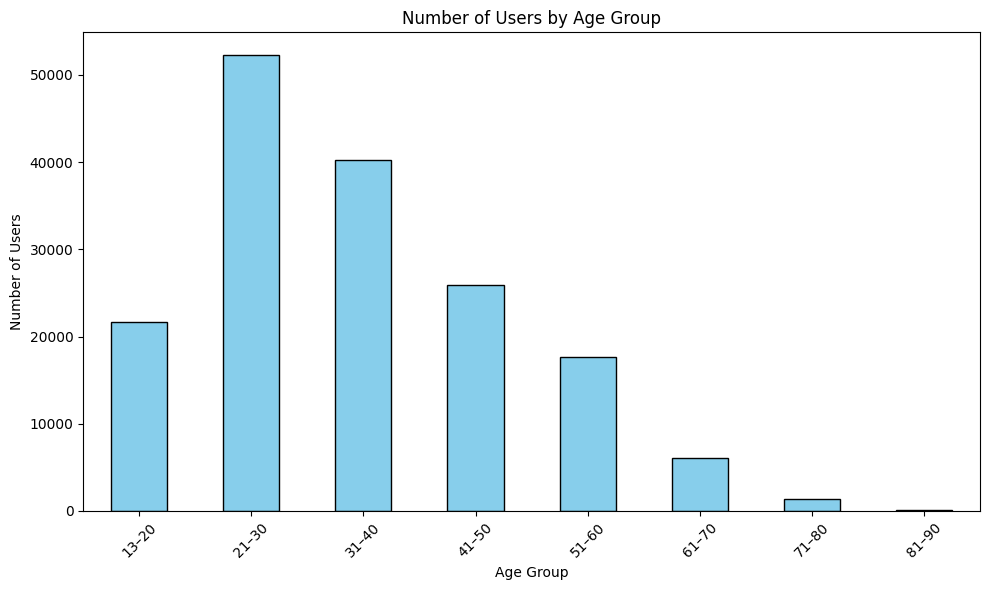

In [70]:
# Chart - 3 visualization code

# Define age bins and labels
bins = [13, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['13–20', '21–30', '31–40', '41–50', '51–60', '61–70', '71–80', '81–90']

# Create age group series
age_groups = pd.cut(users_final1['Age'], bins=bins, labels=labels, right=True)

# Count users per group
age_group_counts = age_groups.value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10,6))
age_group_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Users by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The bar chart displaying the number of users across age groups was selected because it provides a clear and straightforward visual comparison of user distribution across defined ranges. Since the data spans a wide age range (13 to 90), grouping users into bins (like 13–20, 21–30, etc.) helps in identifying which age segments are most engaged without overwhelming the viewer with too many individual age values. This type of chart is ideal for summarizing demographic data, making it easier to derive actionable insights.

##### 2. What is/are the insight(s) found from the chart?

From the chart, it’s evident that the highest concentration of users falls within the 21–30 and 31–40 age groups, followed by a gradual decline as age increases. This suggests that the platform is particularly popular among young adults and early middle-aged users. Engagement among teenagers (13–20) is significant but notably less than the peak age groups. On the other end of the spectrum, there's a steep drop in users above the age of 60, with almost negligible presence in the 81–90 group.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can positively influence business strategy. Marketing campaigns, platform features, and content can be tailored to align with the interests and behaviors of the dominant age groups, particularly the 21–40 segment, potentially improving engagement and retention. At the same time, this chart highlights an opportunity for growth: the underrepresented older age brackets. Targeted outreach or user experience improvements could help tap into this less engaged segment, provided there's a valid market need.

There doesn’t appear to be a direct indicator of negative growth, but the low engagement in older age groups might signal a lack of inclusivity or accessibility in the platform’s current design. Addressing this could prevent missed opportunities and help diversify the user base, which is crucial for long-term sustainability.

#### Chart - 4

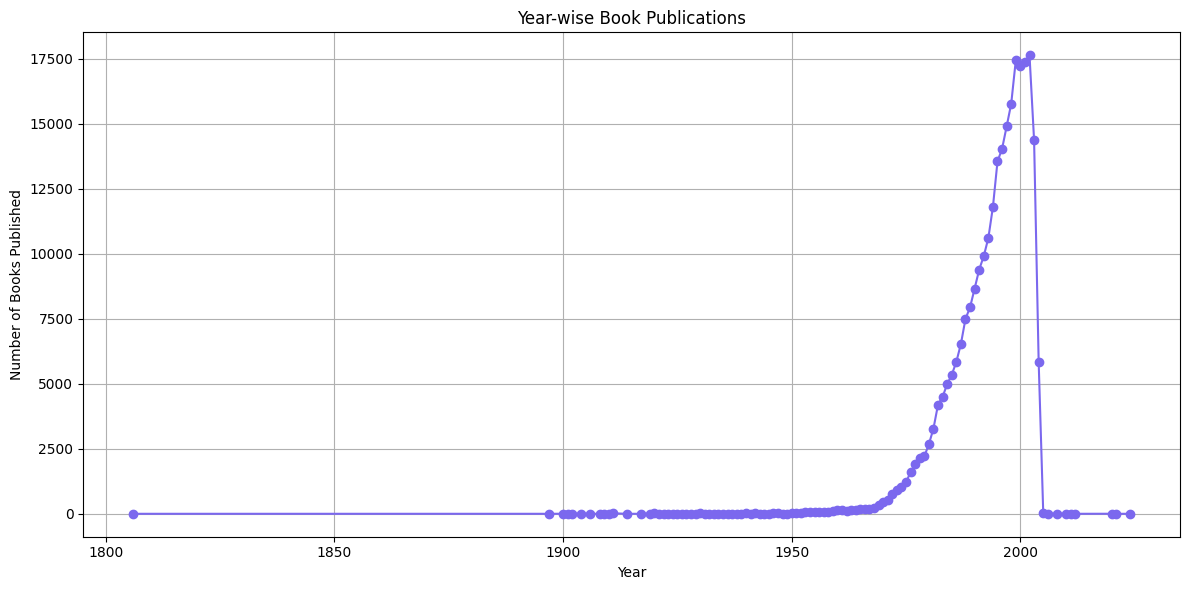

In [71]:
# Chart - 4 visualization code

# Count the number of books published each year
year_counts = books_final['Year-Of-Publication'].value_counts().sort_index()

# Plotting the line chart
plt.figure(figsize=(12, 6))
plt.plot(year_counts.index, year_counts.values, marker='o', linestyle='-', color='mediumslateblue')
plt.title('Year-wise Book Publications')
plt.xlabel('Year')
plt.ylabel('Number of Books Published')
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This line chart is well-suited to show year-wise trends in book publications, as it clearly depicts how publishing volume has changed over time. By connecting data points (each representing the number of books published in a given year), the chart effectively reveals patterns, spikes, and drops that would be less obvious in a tabular format. The use of dots enhances readability and shows the exact values for each year, especially when zooming into denser time periods.

##### 2. What is/are the insight(s) found from the chart?

From the chart, the key insight is the dramatic increase in book publications starting around the 1980s, peaking near the early 2000s. This suggests a major boom in publishing activity, possibly due to digital tools, self-publishing, or the growth of online book platforms. However, there's a sharp decline right after the peak, which might not reflect an actual drop in publishing but could be due to incomplete data for recent years or reduced entries in the dataset post-2004.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From a business standpoint, this kind of trend analysis can help publishers, marketers, and content platforms make data-driven decisions. For instance, identifying years with high publication counts might guide inventory or marketing decisions. Conversely, the steep decline toward recent years might warrant further investigation—whether it’s a real market trend, or just a data collection issue. If the drop is genuine, businesses may need to reconsider their strategies in response to reduced publishing activity.

#### Chart - 5

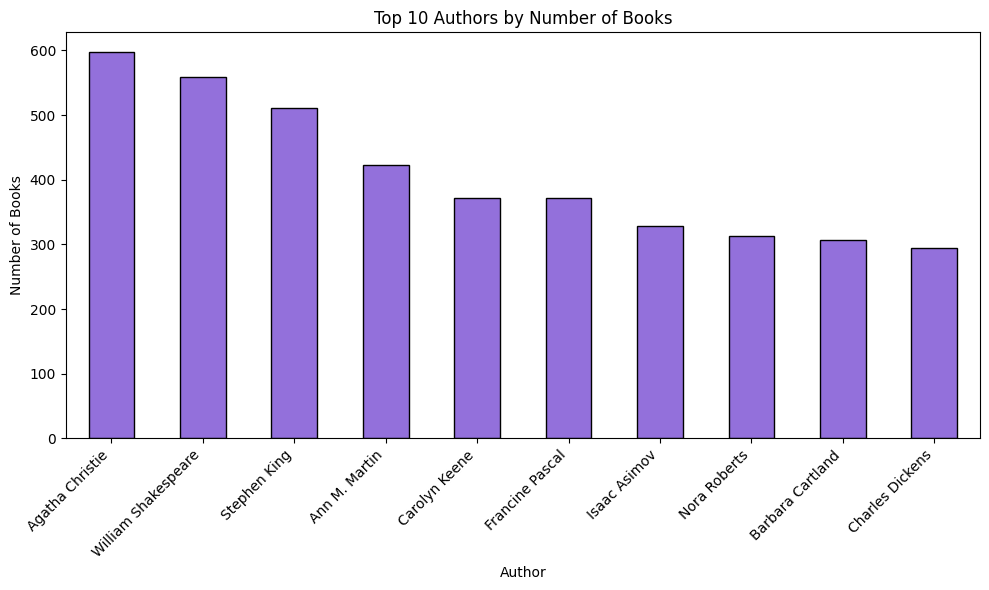

In [72]:
# Chart - 5 visualization code

# Count the number of books per author
top_authors = books_final['Book-Author'].value_counts().head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
top_authors.plot(kind='bar', color='mediumpurple', edgecolor='black')
plt.title('Top 10 Authors by Number of Books')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This bar chart was chosen because it effectively highlights comparisons between discrete categories—in this case, authors. Bar charts are ideal for showing the frequency of occurrences, and here, the number of books published by each author is clearly visible and easily comparable. The top 10 authors are ordered by count, making it easy to spot the most prolific ones at a glance.

##### 2. What is/are the insight(s) found from the chart?

From this chart, we can see that Agatha Christie leads as the most published author in the dataset, followed closely by William Shakespeare and Stephen King. This reflects their long-standing popularity and consistent production of work over time. Additionally, authors like Ann M. Martin, Carolyn Keene, and Isaac Asimov appear prominently, showing a strong presence across different genres and readerships.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from this chart can definitely help create a positive business impact. Platforms can leverage this data to:

* Prioritize inventory or digital licensing for books by these authors.

* Promote these authors more heavily, especially during reading campaigns or seasonal sales.

* Personalize recommendations for users based on bestselling or highly published authors.

There’s no direct insight from this chart that leads to negative growth. However, if a platform relies too heavily on just a few authors, it could indicate overdependence on legacy content rather than investing in new or diverse voices. So while the insights are positive, they also highlight the importance of balancing top-performing content with fresh additions to keep engagement broad and sustainable.

#### Chart - 6

<ipython-input-73-1336117728>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='viridis')


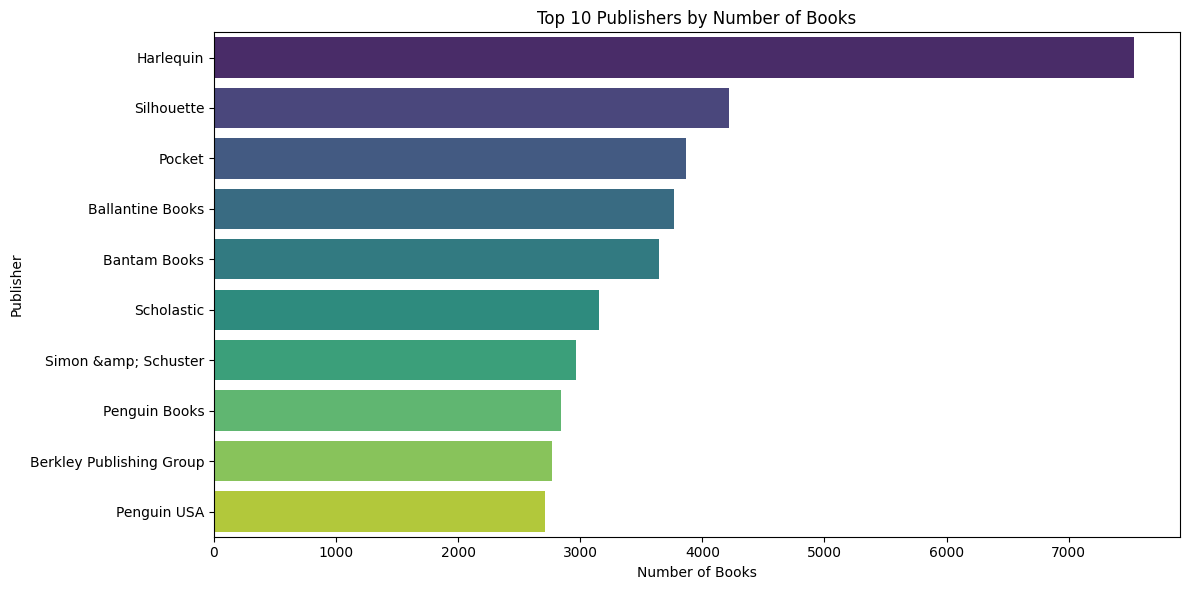

In [73]:
# Chart - 6 visualization code

# Count number of books per publisher
top_publishers = books_final['Publisher'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='viridis')
plt.title('Top 10 Publishers by Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The reason for choosing a horizontal bar chart to display the top 10 publishers by number of books is its effectiveness in presenting categorical data where publisher names can be long. This layout makes the names fully readable and allows for a clear visual comparison of the number of books published by each. A vertical bar chart would require rotating the x-axis labels, making it harder to interpret.

##### 2. What is/are the insight(s) found from the chart?

The insights from this chart show that Harlequin stands out significantly, publishing far more books than any other publisher in the dataset. This dominance indicates a strong presence in the market, possibly in a specific genre such as romance. Other publishers like Silhouette, Pocket, and Ballantine Books also show high volumes, suggesting a solid backlist or consistent output over time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From a business perspective, these insights are valuable. They help in identifying major players in the publishing industry, which could be beneficial for authors seeking publishers with a large catalog, or for marketers aiming to collaborate with publishers that have wide reach. Understanding which publishers dominate can also guide competitors or new entrants in strategizing their entry—whether by aligning with niche markets or directly competing on volume.

There don’t appear to be insights indicating negative growth in this chart. However, if compared across time, a drop in publication volume by any of these top publishers in recent years could signal market shifts or internal challenges, which would then require further investigation.

#### Chart - 7

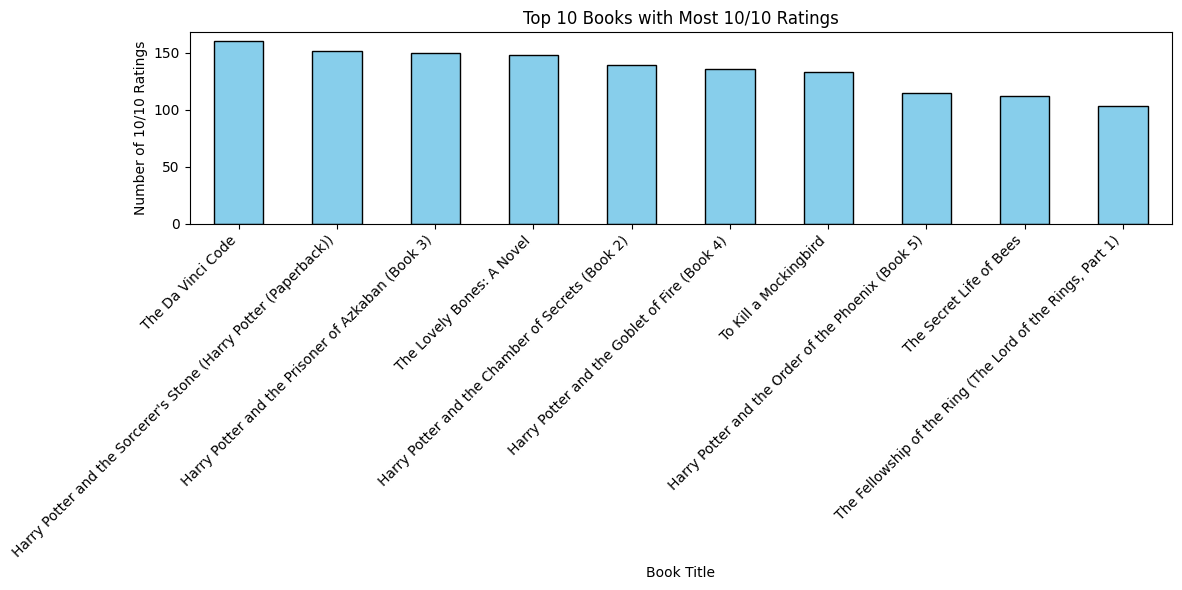

In [74]:
# Chart - 7 visualization code

# Assuming df_ratings is your ratings DataFrame and 'book_title' is merged from books dataset
top_10_books_10_ratings = df[df['Book-Rating'] == 10].groupby('Book-Title').size().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
top_10_books_10_ratings.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Books with Most 10/10 Ratings')
plt.xlabel('Book Title')
plt.ylabel('Number of 10/10 Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




##### 1. Why did you pick the specific chart?

The bar chart titled "Top 10 Books with Most 10/10 Ratings" was likely chosen because it clearly visualizes a ranked comparison of books based on the highest number of perfect ratings. A bar chart is especially effective for this type of analysis because it allows for easy comparison across categories—in this case, book titles—while showing the volume of high ratings each has received. The chart uses horizontal space to accommodate long book titles, which helps in maintaining readability even with detailed labels.

##### 2. What is/are the insight(s) found from the chart?

From the chart, a few insights emerge:

* The Da Vinci Code received the highest number of 10/10 ratings, indicating its exceptional popularity or resonance with readers.

* The Harry Potter series dominates the chart, with six of the top ten entries coming from the series. This reflects the series’ massive appeal and consistently strong fanbase.

* Books like The Lovely Bones, To Kill a Mockingbird, and The Secret Life of Bees also hold prominent positions, suggesting strong emotional or literary connections with readers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights are likely to contribute positively to business strategy, particularly for publishers, booksellers, and marketers. Recognizing which titles or series garner the most enthusiastic ratings can guide decisions on reprints, merchandising, promotional focus, and even the development of similar content.

There's no immediate indication of negative growth from the insights, as all titles on the chart are performing well in terms of reader approval. However, one potential caution could be over-reliance on a single franchise, such as Harry Potter. While beneficial in the short term, it might pose a risk if the trend shifts or saturation occurs. Hence, diversifying offerings or scouting for emerging authors with high potential might be a prudent long-term strategy.

#### Chart - 8

Book-Title
Chobits (Chobits)                               8.035714
Free                                            8.017857
El Hobbit                                       7.692308
Where the Sidewalk Ends : Poems and Drawings    7.121212
A Kiss for Little Bear                          7.100000
Bad Business                                    7.000000
Harry Potter y el cÃ¡liz de fuego               6.833333
Love You Forever                                6.791667
The Hobbit (Leatherette Collector's Edition)    6.791667
Falling Up                                      6.743590
Name: Book-Rating, dtype: float64


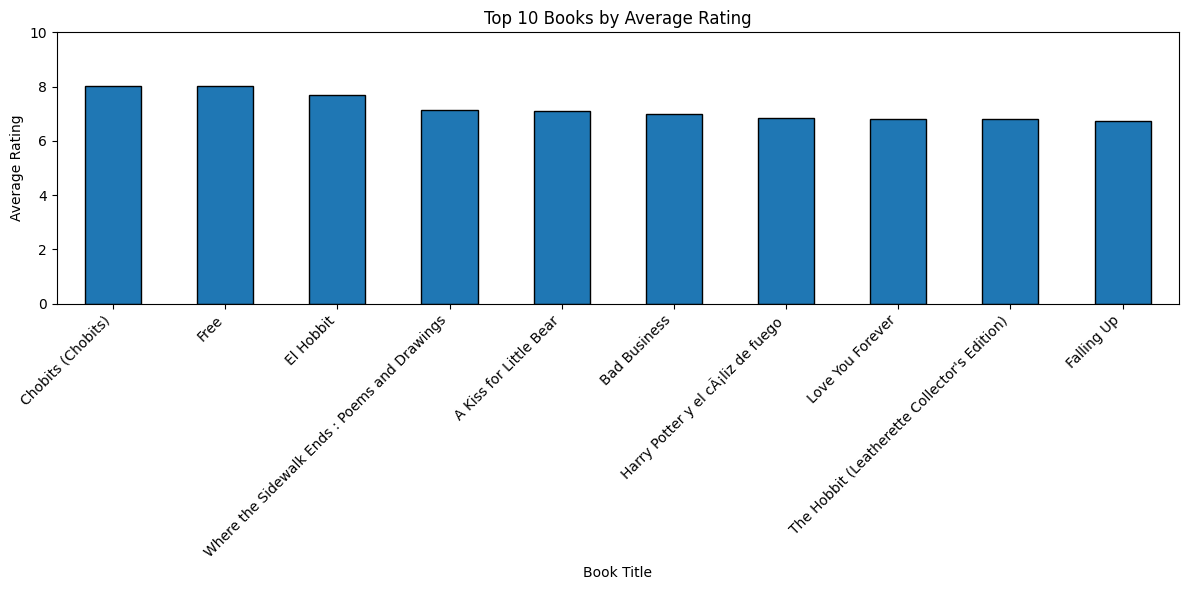

In [75]:
# Chart - 8 visualization code
import pandas as pd
import matplotlib.pyplot as plt

# Calculate average rating for each book
avg_ratings = df.groupby('Book-Title')['Book-Rating'].mean()

# (Optional) Filter to only books with at least N ratings for reliability
min_ratings = 20
rating_counts = df.groupby('Book-Title')['Book-Rating'].count()
reliable_books = rating_counts[rating_counts >= min_ratings].index
avg_ratings = avg_ratings.loc[reliable_books]

# Get top 10 books by average rating
top_10_avg_rated_books = avg_ratings.sort_values(ascending=False).head(10)

# Display the results
print(top_10_avg_rated_books)

# Plot the bar chart
plt.figure(figsize=(12, 6))
top_10_avg_rated_books.plot(kind='bar', edgecolor='black')
plt.title('Top 10 Books by Average Rating')
plt.xlabel('Book Title')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 10)
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

This chart, which displays the "Top 10 Books by Average Rating (Minimum 20 ratings)," was selected because it emphasizes quality over quantity. Unlike the previous chart that focuses on the sheer number of perfect ratings, this one highlights the books that have consistently high ratings, offering insight into reader satisfaction regardless of volume. A bar chart is again a fitting choice here, enabling easy comparison across titles and showcasing which books resonate most with readers on an average scale.

##### 2. What is/are the insight(s) found from the chart?

The insights gathered from this chart are particularly valuable. Books like Chobits, Free, and El Hobbit stand out with the highest average ratings, suggesting they are exceptionally well-received by a more selective or discerning group of readers. This suggests niche popularity or critical acclaim, which can be a strong indicator of quality. The appearance of Harry Potter y el Cáliz de Fuego reaffirms the Harry Potter series' global appeal, especially in translations, while titles like Where the Sidewalk Ends and A Kiss for Little Bear hint at the enduring charm of children's literature.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

hese insights can certainly drive positive business outcomes. Knowing which books score highly on average can inform decisions around premium editions, curated collections, or targeted promotions. For publishers and booksellers, high average ratings often correlate with strong word-of-mouth marketing and long-tail sales potential.

There’s no direct sign of negative growth, though one subtle caution is that some of these books may have received high ratings from a relatively small sample of readers. This could pose a risk if scaled marketing efforts assume broader appeal than actually exists. Therefore, it's essential to pair these insights with additional data, such as number of reviews and sales trends, to fully gauge market potential.

#### Chart - 9

<ipython-input-76-4158084737>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating_per_age_group = df_age_copy.groupby('Age Group')['Book-Rating'].mean()


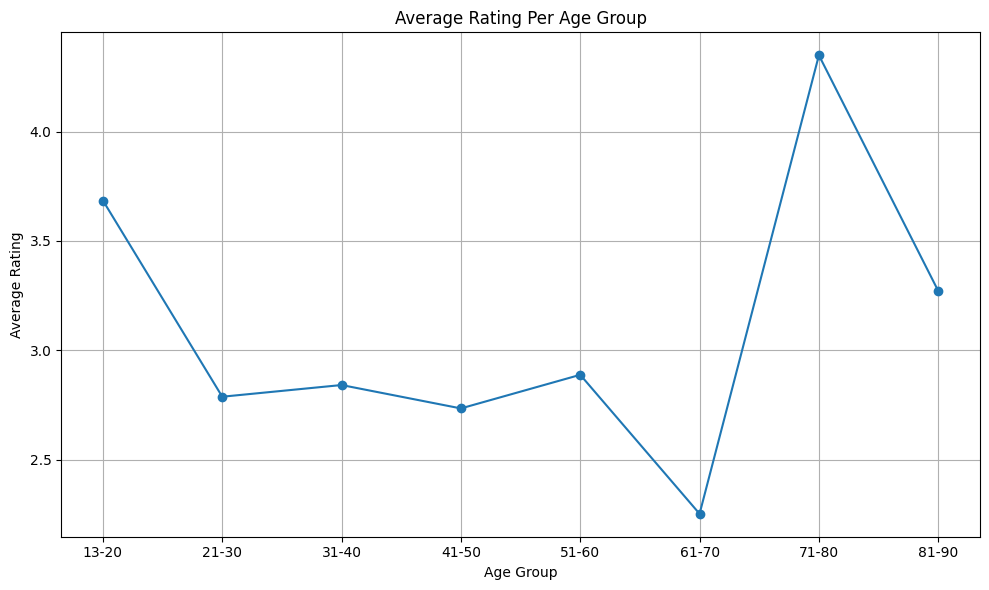

In [76]:
# Chart - 9 visualization code

# Define age groups
bins = [13, 20, 30, 40, 50, 60, 70, 80, 90]  # Adjust as needed
labels = ['13-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']

# Create a new DataFrame and add Age Group column
df_age_copy = df_age.copy()  # Copy the original df_age to avoid modifying it
df_age_copy['Age Group'] = pd.cut(df_age_copy['Age'], bins=bins, labels=labels, right=True)

# Group by 'Age Group' and calculate the mean rating for each group
avg_rating_per_age_group = df_age_copy.groupby('Age Group')['Book-Rating'].mean()

# Plotting
plt.figure(figsize=(10,6))
avg_rating_per_age_group.plot(kind='line', marker='o')
plt.title('Average Rating Per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The chart titled "Average Rating Per Age Group" was selected because it offers a demographic breakdown of user engagement and sentiment, which is critical for understanding customer behavior. A line chart is especially effective here because it not only shows the individual average ratings for each age group but also illustrates trends and fluctuations across generations. This helps in identifying patterns that could influence content targeting and marketing strategies.



##### 2. What is/are the insight(s) found from the chart?

from the chart, we can see some compelling insights. Younger readers aged 13–20 tend to rate books quite positively, with an average rating around 3.7. This suggests a generally enthusiastic or lenient approach to book evaluation, potentially due to excitement or newer exposure to certain genres. Ratings dip among the 21–60 age range, hitting a low in the 61–70 group. This could indicate a more critical readership or a mismatch between available content and their preferences. However, there's a notable surge in ratings from the 71–80 group, with the highest average around 4.3, indicating strong appreciation or satisfaction within this age range. This spike could reflect engagement with nostalgic or classic literature that resonates with older readers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights are valuable for crafting a positive business impact. For instance, publishers and marketers could tailor recommendations or promotional strategies based on age demographics. If younger readers are more responsive, campaigns could emphasize fantasy, YA fiction, or graphic novels. Meanwhile, the spike in older age groups could justify investments in large-print editions, classic literature reprints, or nostalgic branding efforts.

As for potential negatives, the consistently lower ratings from the 21–60 age range could signal disengagement or unmet expectations in a significant portion of the audience. If left unaddressed, this could hinder growth in what is arguably a key consumer base with high purchasing power. Businesses may need to diversify offerings or improve quality perception among this demographic to mitigate potential stagnation in that segment.

#### Chart - 10

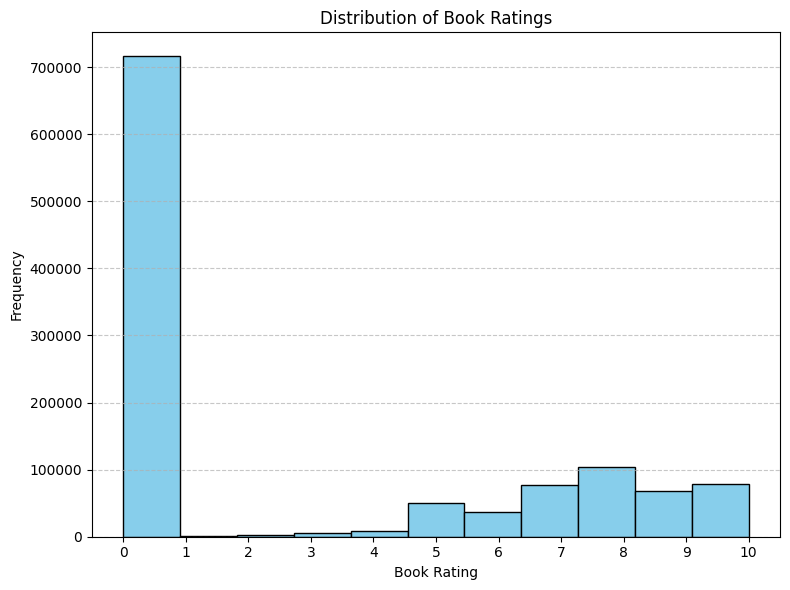

In [77]:
# Chart - 10 visualization code

# Plotting histogram for distribution of Book-Rating
plt.figure(figsize=(8, 6))
plt.hist(ratings_final['Book-Rating'], bins=11, edgecolor='black', color='skyblue')
plt.title('Distribution of Book Ratings')
plt.xlabel('Book Rating')
plt.ylabel('Frequency')
plt.xticks(range(0, 11))  # Ratings from 0 to 10
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The selected chart—a histogram of book rating frequencies—is particularly effective for visualizing the overall distribution of user ratings. This kind of visualization provides a clear snapshot of user sentiment, highlighting not just the popularity of ratings but also anomalies or potential data quality issues. A histogram works well here because it groups ratings into bins and presents them in terms of frequency, making trends and outliers immediately obvious.

##### 2. What is/are the insight(s) found from the chart?

The most striking insight from this chart is the overwhelming number of zero ratings. Ratings of 0 account for more than 700,000 entries, dwarfing all other rating levels. This is followed by a more expected spread in the range of 5–10, with peaks around 7 and 8, indicating that among actual reviews, positive feedback is common. However, the sheer volume of zero ratings could suggest a systemic issue—perhaps users are registering but not rating, or it could reflect missing or default data points that were not filtered out before analysis.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight is critical from a business perspective. On the positive side, the high frequencies in the 7–10 range support the notion that users who do engage tend to enjoy the books, which is a strong endorsement for customer satisfaction. This can inform marketing strategies that highlight high-rated books or encourage more reviews.

On the flip side, the excessive number of zero ratings may indicate a flaw in the rating system or in user engagement. If users are not completing their ratings or if the system is recording null values as zero, this misrepresentation can skew analyses and decision-making. It may lead to underestimating the average rating of books or misclassifying reader satisfaction, which could misinform inventory choices, marketing focus, or content recommendations. Addressing this issue—through improved UX, clearer rating prompts, or data cleaning protocols—would be essential to avoid potential negative impacts on business growth and data reliability.

#### Chart - 11

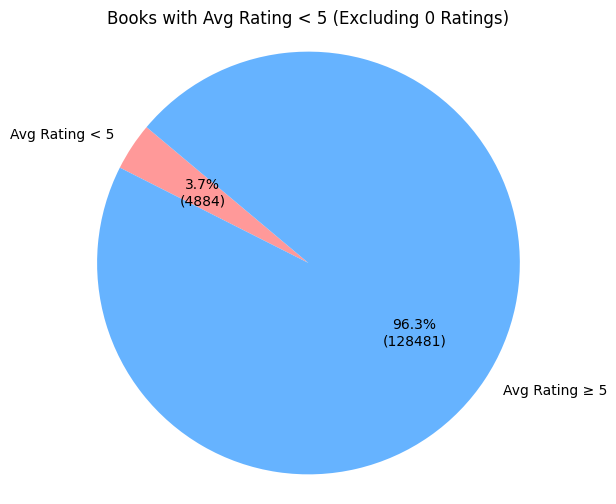

In [78]:
# Chart - 11 visualization
import pandas as pd
import matplotlib.pyplot as plt

# Filter out ratings that are 0
filtered_df = df[df['Book-Rating'] != 0]

# Calculate average rating per book (excluding 0s)
avg_rating_per_book = filtered_df.groupby('Book-Title')['Book-Rating'].mean()

# Count of books with avg rating < 5
low_rated_books_count = (avg_rating_per_book < 5).sum()

# Total number of books with non-zero ratings
total_books_count = len(avg_rating_per_book)

# Data for pie chart
labels = ['Avg Rating < 5', 'Avg Rating ≥ 5']
sizes = [low_rated_books_count, total_books_count - low_rated_books_count]
colors = ['#ff9999', '#66b3ff']

# Plotting
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct=lambda p: f'{p:.1f}%\n({int(p*total_books_count/100)})', startangle=140)
plt.title('Books with Avg Rating < 5 (Excluding 0 Ratings)')
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

This pie chart was chosen because it offers a concise and visually intuitive way to illustrate the proportion of books falling above or below a specific rating threshold. Specifically, it shows the percentage of books with an average rating below 5, while crucially excluding those with 0 ratings—ensuring that only books which received actual user engagement are being evaluated. This choice of chart helps quickly communicate the magnitude of low-rated content compared to positively received titles.

##### 2. What is/are the insight(s) found from the chart?

The main insight drawn from this chart is quite encouraging: only 3.7% of books (4,884 out of 133,365 total rated books) have an average rating below 5, while a vast majority—96.3%—have ratings of 5 or higher. This suggests a generally positive sentiment among readers toward most of the book catalog. By excluding books with 0 ratings, we ensure the analysis focuses on genuine user feedback, avoiding distortions caused by incomplete or missing data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From a business standpoint, this insight is likely to drive a positive impact. The dominance of higher-rated books can be leveraged in marketing campaigns to build consumer trust and promote reader satisfaction. It suggests that the platform or collection is well-curated and aligns with reader expectations. Additionally, it provides a useful benchmark for content quality, allowing stakeholders to focus quality improvement efforts on the small segment of low-rated books.

As for negative implications, there don’t appear to be major red flags from this specific visualization. However, if left unchecked, even the small percentage of poorly rated books could affect user perception over time. Continued monitoring and perhaps retiring or improving those titles could further enhance overall satisfaction and engagement.

#### Chart - 12

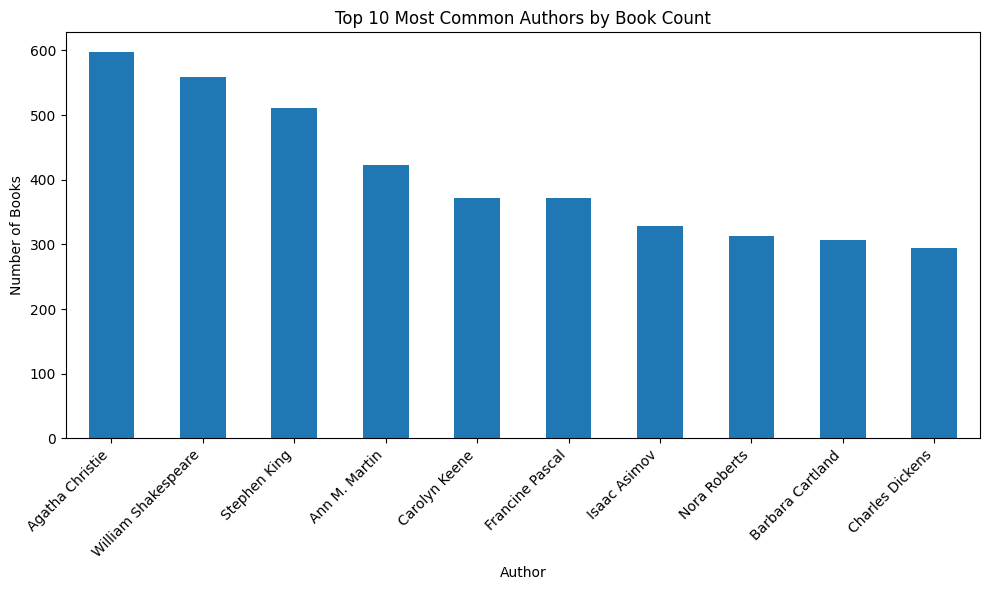

In [79]:
# Chart - 12 visualization code

# Group by 'Book-Author' and count the number of books per author
top_authors = books_final['Book-Author'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_authors.plot(kind='bar')
plt.title('Top 10 Most Common Authors by Book Count')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This bar chart was selected because it effectively visualizes the comparative count of books authored by the top 10 most common authors in the dataset. Its format provides a clear and immediate understanding of the relative volume of work associated with each author. This visual clarity is especially useful when analyzing categorical data like author names and their corresponding book counts, helping identify which authors dominate the collection.

##### 2. What is/are the insight(s) found from the chart?

The insight revealed is quite strategic: a significant portion of the book inventory is concentrated among a few prolific authors, with Agatha Christie, William Shakespeare, and Stephen King topping the list. This suggests strong representation of classic and popular authors in the catalog, which can be advantageous in attracting and retaining readers who gravitate towards well-known names. It also signals potential for curating focused author-themed marketing campaigns or reading challenges.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From a business perspective, these insights can certainly support positive outcomes. High book counts for popular authors provide a robust foundation for engagement strategies, personalized recommendations, or curated collections that can increase user satisfaction and time spent on the platform. They can also guide inventory or licensing decisions, ensuring continued access to high-demand content.

There isn’t an immediate indication of negative growth from this chart. However, overdependence on a few authors might pose a risk of limited content diversity, potentially alienating users looking for fresh or niche material. If overlooked, this could hinder discovery and reduce engagement over time. Therefore, while the insight is largely positive, it also underlines the importance of balancing popular titles with new and diverse voices to support sustained growth.

#### Chart - 13

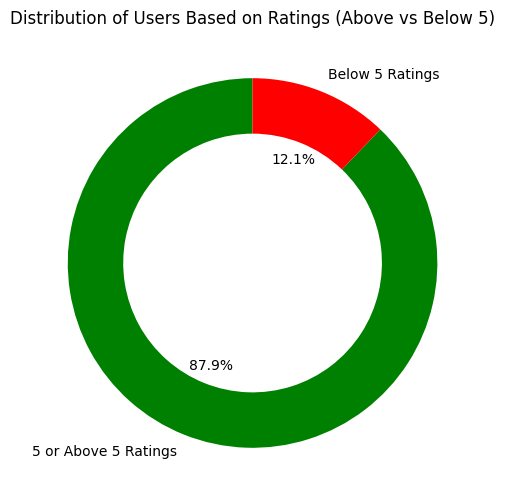

In [80]:
# Chart - 13 visualization code

# Filter out 0 ratings
ratings_filtered = ratings_final[ratings_final['Book-Rating'] != 0]

# Count users who gave ratings above 5
users_above_5 = ratings_filtered[ratings_filtered['Book-Rating'] >= 5]['User-ID'].nunique()

# Count users who gave ratings below 5
users_below_5 = ratings_filtered[ratings_filtered['Book-Rating'] < 5]['User-ID'].nunique()

# Data preparation
rating_counts = [users_above_5, users_below_5]
labels = ['5 or Above 5 Ratings', 'Below 5 Ratings']

# Plotting a donut chart
fig, ax = plt.subplots(figsize=(8, 6))

# Creating the pie chart with a 'wedge' style to make it a donut
ax.pie(rating_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['green', 'red'], wedgeprops={'width': 0.3})

# Adding title
ax.set_title('Distribution of Users Based on Ratings (Above vs Below 5)')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

The donut chart was chosen because it offers an immediate, intuitive view of how the user base splits between those who tend to give more positive feedback (ratings of 5 and above) versus those who are more critical (ratings below 5). By turning the simple two-category comparison into a ring, the chart maximizes visual clarity—percentages are front and center, and the hole in the middle draws the eye to the contrast between the two groups.

##### 2. What is/are the insight(s) found from the chart?

From the chart, we see that nearly nine in ten users (about 88 %) give ratings of 5 or above, while only about 12 % rate below that threshold. This tells us that most readers on the platform are generally satisfied or enthusiastic about the books they encounter, with relatively few expressing consistently low ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Knowing that the vast majority of users lean positive has direct business implications. It suggests that a recommendation engine can safely emphasize popular titles and user favorites, confident that most users will respond favorably. It also highlights a smaller but important segment of more critical readers—understanding their preferences could help surface niche or higher-quality content to improve overall satisfaction. There is no immediate sign of negative growth here, but if the proportion of below-5 raters were to grow over time, it could indicate rising user dissatisfaction—an early warning to revisit content quality or recommendation accuracy.

#### Chart - 14 - Correlation Heatmap

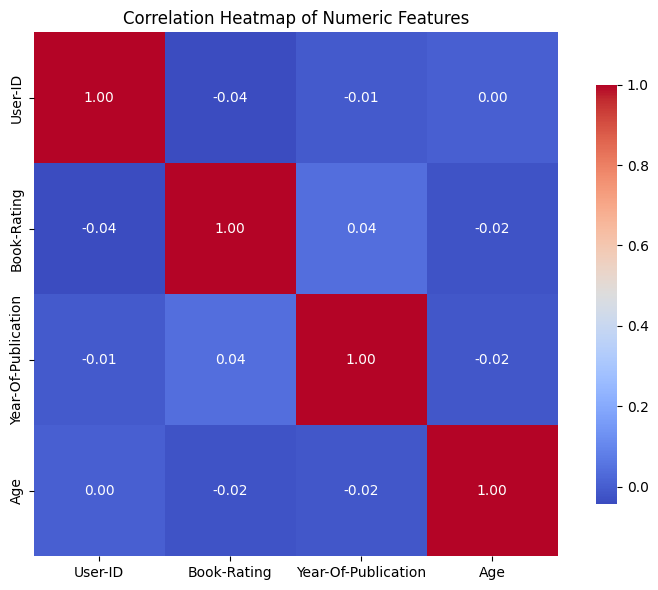

In [81]:
# Correlation Heatmap visualization code

# 1. Select only numeric columns
numeric_df = df_age.select_dtypes(include=['number'])

# 2. Compute correlation matrix
corr = numeric_df.corr()

# 3. Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

The correlation heatmap was chosen because it provides a concise, color-coded overview of how each numeric feature in the dataset relates to the others. In the context of a recommender system, understanding these relationships—whether strong, weak, or nonexistent—helps guide feature selection and informs whether variables might be redundant or particularly informative when building models.

##### 2. What is/are the insight(s) found from the chart?

From the heatmap, we see that Book-Rating has very little correlation with User-ID, Year-Of-Publication, or Age (all coefficients hover near zero). This confirms that a user’s average score is largely independent of their identity, the book’s publication date, and the user’s age—suggesting that collaborative filtering (which leverages user–item interactions) should rely on rating patterns rather than demographic features. The near-zero correlation between Year-Of-Publication and Age also indicates that older users are not necessarily more inclined toward older books. Overall, the lack of strong linear correlations tells us that we’ll need to explore more sophisticated or non-linear relationships rather than depending on simple, directly correlated predictors.

#### Chart - 15 - Pair Plot

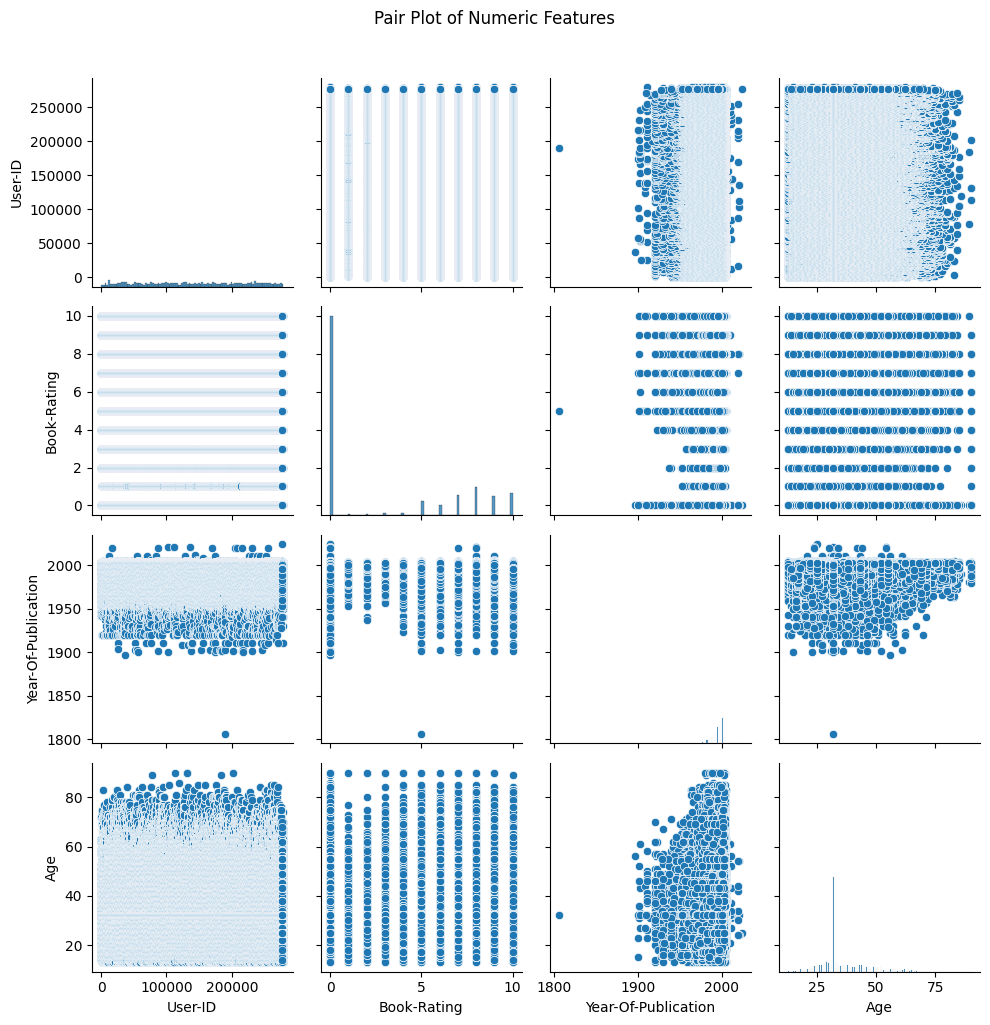

In [82]:
# Pair Plot visualization code

# Select only numeric columns
numeric_df = df_age.select_dtypes(include=['number'])

# Create pair plot
sns.pairplot(numeric_df)
plt.suptitle("Pair Plot of Numeric Features", y=1.02)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The pair plot was chosen because it offers a compact, at-a-glance way to examine every two-way relationship among all numeric variables in the dataset—and to see each variable’s distribution along the diagonal. In the context of our book recommender EDA, this helps us quickly verify whether any obvious linear or non-linear associations exist between a user’s ID (as a proxy for user activity), their ratings, the book’s publication year, and the user’s age.

##### 2. What is/are the insight(s) found from the chart?

Looking across the off-diagonal scatter panels, one sees that ratings are essentially randomly scattered against user ID, publication year, and age—with no clear trend or slope—confirming that no simple bivariate relationship governs how people rate books. The dense, vertical “stripes” in the User-ID vs. Year and User-ID vs. Age plots simply reflect the many users who each contribute a handful of ratings, while the Year vs. Age plot also shows that older books tend to be rated by a wide range of ages, but with a slight clustering of younger readers around more recent titles. The diagonal histograms and KDEs reaffirm that most ratings cluster around mid-range values, publication years peak in the late 1990s to 2000s, and user ages concentrate between about 20 and 40. Together, these observations emphasize that our recommender should rely on multi-dimensional patterns (such as collaborative filtering or latent factors) rather than any single two-variable correlation—and that while demographic splits (age, year) are useful for segmentation, they are not in themselves strong predictors of rating behavior.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Books published more recently (after 2000) receive higher average ratings than older books (published in or before 2000)
2. Users from the USA give significantly different ratings than users from non-USA locations.
3. Users who rate more books tend to give lower average ratings than those who rate fewer books.
3. Popular books (with more ratings) have higher or lower average ratings


In [83]:
df = pd.read_csv('/content/df.csv')
df_age  = pd.read_csv('/content/df_age.csv')

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H₀):**

The average book ratings for books published after 2000 are equal to or less than those published in 2000 or earlier.

new <= old

**Alternative Hypothesis (Hₐ):**

The average book ratings for books published after 2000 are greater than those published in 2000 or earlier.

new > old


#### 2. Perform an appropriate statistical test.

In [84]:
# Perform Statistical Test to obtain P-Value

import pandas as pd
from scipy.stats import ttest_ind

df3=df.copy()
# Group into old and new books
old_books = df3[df3['Year-Of-Publication'] <= 2000]['Book-Rating']
new_books = df3[df3['Year-Of-Publication'] > 2000]['Book-Rating']

# Perform one-tailed t-test (Welch’s t-test due to possible unequal variances)
t_stat, p_value_two_tailed = ttest_ind(new_books, old_books, equal_var=False)
p_value_one_tailed = p_value_two_tailed / 2

print(f"One-tailed P-value: {p_value_one_tailed:.4f}")

One-tailed P-value: 0.0000


In [85]:
import pandas as pd
# Create a new column for book age group

df3['Book_Age_Group'] = df['Year-Of-Publication'].apply(lambda x: 'Old (≤2000)' if x <= 2000 else 'New (>2000)')


# Calculate the average rating for each group
average_ratings = df3.groupby('Book_Age_Group')['Book-Rating'].mean()

print(average_ratings)

Book_Age_Group
New (>2000)    3.117605
Old (≤2000)    2.732659
Name: Book-Rating, dtype: float64


##### Which statistical test have you done to obtain P-Value?

specifically, a one-tailed Welch's t-test was used to compare the mean book ratings of two independent groups:

* Books published after 2000 (new_books)

* Books published in or before 2000 (old_books)



##### Why did you choose the specific statistical test?

1.Comparing Means of Two Independent Groups:
  * The goal was to test if new books have a higher average rating than old books, which involves comparing the means of two separate groups.

  * Unequal Sample Sizes & Variances:

2.The number of new vs. old books may be different.

  * Variance in ratings could also be unequal between groups.
  * Welch’s t-test is more robust than the Student’s t-test in such cases.

3.One-tailed test for directional hypothesis:

  * The hypothesis was directional: “new books are rated higher”, not just “different.”

  * Hence, we used a one-tailed version of the test.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H₀):**

There is no difference in average book ratings between USA users and non-USA users.

(USA = Non-USA)

**Alternative Hypothesis (Hₐ):**

There is a significant difference in average book ratings between USA users and non-USA users.
(USA != Non-USA)

#### 2. Perform an appropriate statistical test.

In [86]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
from scipy.stats import ttest_ind

# Create a new column to classify users as USA or non-USA
df3 = df.copy()
df3['Is_USA'] = df3['Location'].str.lower().str.contains('usa')

# Get ratings from each group
usa_ratings = df3[df3['Is_USA']]['Book-Rating']
non_usa_ratings = df3[~df3['Is_USA']]['Book-Rating']

# Perform Welch’s t-test (unequal variances)
t_stat, p_value = ttest_ind(usa_ratings, non_usa_ratings, equal_var=False)

print(f"Two-tailed P-value: {p_value:.4f}")


Two-tailed P-value: 0.0000


In [87]:
usa_mean = usa_ratings.mean()
non_usa_mean = non_usa_ratings.mean()
print(f"USA mean: {usa_mean:.2f}")
print(f"non-USA mean: {non_usa_mean:.2f}")


USA mean: 2.70
non-USA mean: 3.20


##### Which statistical test have you done to obtain P-Value?

 Welch's t-test (independent two-sample t-test with unequal variances)

##### Why did you choose the specific statistical test?

* We are comparing the mean ratings of two independent groups (USA vs. non-USA users).

* The sample sizes and variances may differ between the groups.

* Welch’s t-test is more reliable than the standard t-test when variances or group sizes are unequal.

* It is a parametric test suitable for comparing continuous numeric data like ratings.

* We are not testing for direction (greater/lesser) but simply whether the means differ, so we use a **two-tailed version**.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

missing values are handled during the cleaning process

#### What all missing value imputation techniques have you used and why did you use those techniques?

We have so many null values in the Age column. After removing the outliers the null values are imputed by the median value.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

We have also handled outliers during the cleaning process

##### What all outlier treatment techniques have you used and why did you use those techniques?

* Removed age below 30 and above 90
* Removed the published year below 1700 and above 2025
* Checked if there is any review below 0 and above 10

In [89]:
import pandas as pd
df = pd.read_csv('/content/df.csv')
df_age = pd.read_csv('/content/df_age.csv')

### 3. Categorical Encoding

In [92]:
# Encode your categorical columns
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le_author = LabelEncoder()
le_publisher = LabelEncoder()
le_title = LabelEncoder()

df3 = df.copy()

# Encode columns
df3['Book-Author-Encoded'] = le_author.fit_transform(df3['Book-Author'])
df3['Publisher-Encoded'] = le_publisher.fit_transform(df3['Publisher'])
df3['Book-Title-Encoded'] = le_title.fit_transform(df3['Book-Title'])


In [93]:
df3

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Location,Book-Author-Encoded,Publisher-Encoded,Book-Title-Encoded
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",60833,1360,66693
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,"seattle, washington, usa",51118,6721,147818
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,"h, new south wales, australia",71422,15466,197087
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,"rijeka, n/a, croatia",76948,2515,80867
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,"rijeka, n/a, croatia",90607,2515,172325
...,...,...,...,...,...,...,...,...,...,...,...,...
1017059,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998,A.R.E. Press (Association of Research &amp; Enlig,http://images.amazon.com/images/P/0876044011.0...,"cedar park, texas, usa",54742,101,56581
1017060,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,"cedar park, texas, usa",16368,8691,72519
1017061,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,http://images.amazon.com/images/P/0679447156.0...,"quebec, quebec, canada",3889,459,56948
1017062,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,"mannington, west virginia, usa",13547,7760,204007


#### What all categorical encoding techniques have you used & why did you use those techniques?

In my book recommender system project, I used Label Encoding for categorical features such as:

* Book-Author

* Publisher

* Book-Title

I chose Label Encoding for the following reasons:

1.High Cardinality:

These features had a large number of unique values (e.g., over 2,500 unique authors). Using one-hot encoding would have resulted in a very high-dimensional and sparse dataset, which is inefficient in both memory and computation.

2.Efficiency and Scalability:

Label encoding is memory-efficient and works well when we need to represent categories as numeric IDs — which is ideal for collaborative filtering techniques that require user-item matrices with integer indices.

3.Model Compatibility:

I used label-encoded values in preparation for building both collaborative filtering models and hybrid models. For hybrid models, these encoded values can easily be passed into embedding layers when using deep learning architectures.

4.Ease of Integration:

Label encoding made it easy to integrate categorical variables into recommendation algorithms like matrix factorization, KNN-based collaborative filtering, and neural networks.

## ***7. ML Model Implementation***

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/df.csv')

### ML Model 1 - Collaborative Filtering

In [94]:
# we are filtering out the users who have given rating more than 200 times
x = df.groupby('User-ID').count()['Book-Rating'] > 200
active_users = x[x].index
active_users

Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,   6323,
         6543,
       ...
       271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427, 277639,
       278418],
      dtype='int64', name='User-ID', length=800)

In [101]:
filtered_df1 = df[df['User-ID'].isin(active_users)]
print(df.shape)
print(filtered_df1.shape)

(1017064, 9)
(467517, 9)


In [96]:
#  Filter books with at least 50 ratings to keep only well-known titles
y = filtered_df1.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index
famous_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=698)

In [97]:
# Keep only the rows for books that have at least 50 ratings (i.e., are in famous_books)
filtered_df2 = filtered_df1[filtered_df1['Book-Title'].isin(famous_books)]
filtered_df2 .shape

(57835, 9)

In [98]:
# Create a user-item matrix with book titles as rows and users as columns
pivot = filtered_df2.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
pivot.fillna(0,inplace=True)
pivot

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
# Compute cosine similarity between books based on user rating patterns
from sklearn.metrics.pairwise import cosine_similarity
similarity_scores = cosine_similarity(pivot)
similarity_scores

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04402619],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14549498],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.11012672],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0200112 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.1081564 ],
       [0.04402619, 0.14549498, 0.11012672, ..., 0.0200112 , 0.1081564 ,
        1.        ]])

In [103]:
similarity_scores.shape

(698, 698)

In [114]:
def collaborative_recommend(book_name):
    # index fetch
    index = np.where(pivot.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]

    recommendations = []
    for i in similar_items:
        item = []
        temp_df = df[df['Book-Title'] == pivot.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        recommendations.append(item)

    return recommendations

In [115]:
# test1
collaborative_recommend('Harry Potter and the Prisoner of Azkaban (Book 3)')

[['Harry Potter and the Goblet of Fire (Book 4)'],
 ['Harry Potter and the Chamber of Secrets (Book 2)'],
 ['Harry Potter and the Order of the Phoenix (Book 5)'],
 ["Harry Potter and the Sorcerer's Stone (Book 1)"],
 ["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))"]]

In [116]:
# test2
collaborative_recommend('Year of Wonders')

[['The Eight'],
 ['A Heartbreaking Work of Staggering Genius'],
 ['Bridget Jones: The Edge of Reason'],
 ["Drowning Ruth (Oprah's Book Club)"],
 ['Midwives: A Novel']]

In [117]:
# test3
collaborative_recommend('A Bend in the Road')

[['A Walk to Remember'],
 ['The Last Time They Met : A Novel'],
 ['Sea Glass: A Novel'],
 ['Angels'],
 ['Family Album']]

####  Explain the ML Model used

**Collaborative Filtering**

This approach recommends books based on the preferences of users with similar tastes. It analyzes user-book interaction (like ratings) to find patterns and suggest books that similar users have enjoyed, without relying on book features.

### ML Model 2 - Content Based Recommendations

In [118]:
import pandas as pd
df = pd.read_csv('/content/df.csv')

In [119]:
# Create a unique book DataFrame and combine title, author, and publisher into a single feature
unique_books_df = df.drop_duplicates(subset='Book-Title').reset_index(drop=True)
unique_books_df['combined'] = (
    unique_books_df['Book-Title'].fillna('') + ' ' +
    unique_books_df['Book-Author'].fillna('') + ' ' +
    unique_books_df['Publisher'].fillna('')
)

In [120]:
unique_books_df.shape

(237446, 10)

In [121]:
# Convert combined book features (title, author, publisher) into TF-IDF vectors
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(unique_books_df['combined'])

In [122]:
# Fit a KNN model using cosine similarity on the TF-IDF matrix
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(n_neighbors=6, metric='cosine')
model.fit(tfidf_matrix)

NearestNeighbors(metric='cosine', n_neighbors=6)

In [123]:
# Define a function to recommend similar books using the trained KNN model

def content_recommend(book_title):
    idx = unique_books_df[unique_books_df['Book-Title'].str.lower() == book_title.lower()].index
    if len(idx) == 0:
        return "Book not found in dataset."

    book_idx = idx[0]
    distances, indices = model.kneighbors(tfidf_matrix[book_idx], n_neighbors=6)

    recommendations = []
    for i in indices[0][1:]:
        recommendations.append(unique_books_df.iloc[i]['Book-Title'])

    return recommendations

In [125]:
# test1
results = content_recommend("Harry Potter and the Prisoner of Azkaban (Book 3)")

for i, title in enumerate(results, start=1):
    print(f"{i}. {title}")

1. Harry Potter and the Prisoner of Azkaban (Harry Potter)
2. Harry Potter and the Prisoner of Azkaban
3. Harry Potter and the Prisoner of Azkaban (Book 3, Audio)
4. Harry Potter and the Prisoner of Azkaban (Harry Potter (Paperback))
5. Harry Potter and the Prisoner of Azkaban (Book 3 Audio CD)


In [126]:
# test2
results = content_recommend("Year of Wonders")

for i, title in enumerate(results, start=1):
    print(f"{i}. {title}")

1. Year of Wonders: A Novel of the Plague
2. Foreign Correspondence
3. World of Wonders
4. World of wonders
5. Nine Parts of Desire: The Hidden World of Islamic Women


In [127]:
# test3
results = content_recommend("A Bend in the Road")

for i, title in enumerate(results, start=1):
    print(f"{i}. {title}")

1. The Rescue
2. The Guardian
3. The Notebook
4. A Walk to Remember
5. Nights in Rodanthe


#### Explain the ML Model used

**Content-Based Filtering**


This model recommends books that are similar in content to what the user has already liked, using features such as title, author, or publisher. It uses similarity metrics like cosine similarity to compare items based on their attributes.

### ML Model 3 - Popularity Based Recommendation

In [128]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/df.csv')

In [129]:
# Create a DataFrame with the number of ratings each book has received
book_num_rating_df = df.groupby('Book-Title').count()['Book-Rating'].reset_index()
book_num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
book_num_rating_df.head()

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [130]:
# Create a DataFrame with the average rating of each book
book_avg_rating_df = df.groupby('Book-Title')['Book-Rating'].mean().reset_index()
book_avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
book_avg_rating_df.head()

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00


In [131]:
# Combine both dataframes
best_books_df = book_num_rating_df.merge(book_avg_rating_df,on='Book-Title')
best_books_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
237441,Ã?Â?lpiraten.,2,0.000000
237442,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
237443,Ã?Â?sterlich leben.,1,7.000000
237444,Ã?Â?stlich der Berge.,3,2.666667


In [132]:
# Select top 50 highly rated books with at least 250 ratings
popular_df = best_books_df[best_books_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)
popular_df.head()

,Book-Title,num_ratings,avg_rating
79026,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
79014,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
79033,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
79018,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
79006,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453


In [133]:
#  Function to Get Top N Popular Books
def show_popular_books(n=10):
    titles = popular_df['Book-Title'].head(n).to_list()
    for i, title in enumerate(titles, start=1):
        print(f"{i}. {title}")


In [134]:
show_popular_books(7)

1. Harry Potter and the Prisoner of Azkaban (Book 3)
2. Harry Potter and the Goblet of Fire (Book 4)
3. Harry Potter and the Sorcerer's Stone (Book 1)
4. Harry Potter and the Order of the Phoenix (Book 5)
5. Harry Potter and the Chamber of Secrets (Book 2)
6. The Hobbit : The Enchanting Prelude to The Lord of the Rings
7. The Fellowship of the Ring (The Lord of the Rings, Part 1)


Explain the ML Model used

**Popularity-Based Recommendation**


This method recommends books that are most popular overall, based on metrics like the number of ratings or average rating. It does not consider individual user preferences and works well as a baseline or for new users.

# **Conclusion**

In this project, we successfully built a Kindle Book Recommender System using three different approaches: popularity-based, content-based, and collaborative filtering. The popularity model provides recommendations based on highly rated and frequently read books, ensuring strong general suggestions. The content-based model recommends books with similar attributes, helping users discover titles closely related to their interests. Collaborative filtering uses user behavior to suggest books liked by similar readers, making recommendations more personalized. By combining these techniques, the system offers a well-rounded and effective way to guide users toward books they are likely to enjoy, enhancing their overall reading experience.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***